# Classification des Iris

Dans cet exemple, nous allons développer quelques modèles d'apprentissage automatique afin de classifier différentes espèces d'Iris, en particulier l'iris Setosa (iris de l'Alaska), Versicolor (ou clajeux) et Virginica (de Virginie).

Nous allons résoudre ce problème pas-à-pas afin de bien comprendre les différentes étapes mises en oeuvre dans l'apprentissage automatique, ainsi que certaines notions mathématiques associées.

La [base données des Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) fait partie du module Python [Sci-kit learn](https://scikit-learn.org/stable/).

![Iris Versicolor](images/iris_versicolor.png "Iris Versicolor")

La base de données contient 50 échantillons de chacune des espèces d'iris mentionnées précédemment. Quatre caractéristiques ont été mesurées sur chaque échantillon : la longueur et la largeur des pétales et des sépales (en centimètres). Ces caractéristiques peuvent être utilisées pour classifier ou prédire l'espèce de l'iris. 


In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import math

## Chargement des données

In [ ]:
iris = datasets.load_iris()

In [ ]:
print(iris.DESCR)

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
len(iris.data)

In [ ]:
iris.data

In [ ]:
iris.target

## Affichage des longueurs et largeurs des sépales

In [ ]:
# Enregistrement dans la variable X des longueurs des sépales
# et dans la variable Y des largeurs des sépales
X = iris.data[:, 0]
Y = iris.data[:, 1]

# Les masques contenus dans le tableau iris.target vont être utlisés pour donner une couleur à chaque espèce d'iris
Masque_Couleur = iris.target

plt.scatter(X, Y, c=Masque_Couleur)
plt.xlabel('Longueur des Sépales (cm)')
plt.ylabel('Largeur des Sépales (cm)')
plt.title('Distribution des dimensions des Sépales')

## Affichage des longueurs et largeurs des pétales

In [ ]:
# Code à compléter

## Modèle de Regression Logistique

Nous allons créer un modèle qui va prédire si un échantillon appartient à une des catégories des espèces d'iris ou non.

La structure de ce modèle est la suivante :

![Regression logistique](images/perceptron75.png "Perceptron")

## Function Sigmoïde

La [fonction Sigmoïde](https://fr.wikipedia.org/wiki/Sigmo%C3%AFde_(math%C3%A9matiques) est utilisée en regression logistique et dans les neuronnes artificiels. C'est une manière de transformer des valeurs continues en valeurs binaires. Cette fonction est également appellée "Fonction d'activation" dans les réseaux de neuronnes. De nombreux types de fonctions d'activations sont utilisés aujourd'hui.

In [ ]:
def sigmoid(z):
  return 1.0/(1 + math.e ** (-z))

x = [i * 0.1 for i in range(-50, 51)]
y = [sigmoid(z) for z in x]
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic Sigmoid')

## Fonction de prédiction

This function takes one sample, multiplies by the weights, adds a bias, and passes the sum through a Sigmoid function. This function will be used to determine weights and biases during training as well as make predictions after training is complete.

In [ ]:
def predict(sample):
  result  = 0.0
  for i in range(len(sample)):
    result = result + weights[i] * sample[i]
    
  result = result + bias
  return sigmoid(result)

## Loss and Cost Functions

The loss function compares the predicted output with the expected output for a single training sample. If the absolute difference between the predicted and expected output is high, the loss should be high. The loss function here is a bit more complicated than a simple difference between predicted output and expected output, because it is known to make training easier.

$$\mathcal L(y, \hat y) = -(y \log \hat y + (1-y) \log (1 - \hat y))$$

Where $\mathcal L$ is the loss, $y$ is the training sample or ground truth, and $\hat y$ is the predicted value from the model.

In [ ]:
def loss(y_train, y_predicted):
  return -(y_train * math.log(y_predicted) + (1.0 - y_train) * math.log(1 - y_predicted))

We can see how this function behaves for a fixed training value and a range of predicted values.

Text(0.5, 1.0, 'Loss near 0.90')

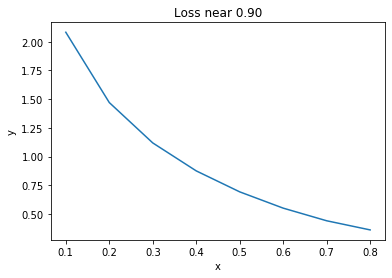

In [ ]:
y_train = 0.9
x = [i * 0.1 for i in range(1, 9)]
y = [loss(y_train, yp) for yp in x]
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Loss near %0.2f' % y_train)

The cost function is the average of the loss over all training samples:

$$\mathcal J = \frac{1}{m} \sum_{i=0}^{m} \mathcal L(y, \hat y)$$

## Gradient Descent

Gradient descent attempts to minimize the cost function by iteratively adjusting weights and biases in the direction of lower cost. This achieved by computing the derivative (gradient) or slope of the cost function for each of the weights and biases.

The general equations are

$$w_{k+1} = w_{k} - \alpha \frac{\partial \mathcal J}{\partial w}$$

$$b_{k+1} = b_{k} - \alpha \frac{\partial \mathcal J}{\partial b}$$

Where $w_{k}$ and $b_{k}$ are the current values of weights and biases, and $w_{k+}$ and $b_{k+1}$ are the next values after one iteration. The number $\alpha$ is the learning rate, which is a tuning parameter or hyperparameter. If the learning rate is too small, it will take longer to train, whereas too large of a training value might result in wild oscillations that never converge on an optimum solution.

To picture how this works, let's consider an example in two dimensions:

$$y = x^2 + \frac{x}{2}$$

Text(0.5, 1.0, 'Simple function')

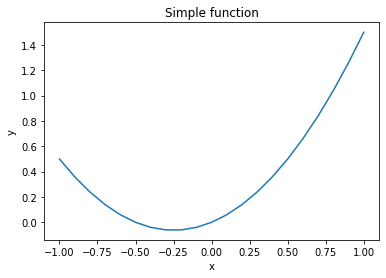

In [ ]:
def parabola(x):
    return x**2 + x/2.0

x = [i * 0.1 for i in range(-10, 11)]
y = [parabola(xi) for xi in x]
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple function')

The first derivative, or the slope at any point $x$ is:

$$\frac{\partial y}{\partial x} = 2x + 0.5$$

To find the minimum, iterate using this equation:

$$x_{k+1} = x_{k} - \alpha \frac{\partial y}{\partial x}$$

Estimated minimum -0.17, -0.06
Derivative (gradient) 0.20


Text(0.5, 1.0, 'Simple function')

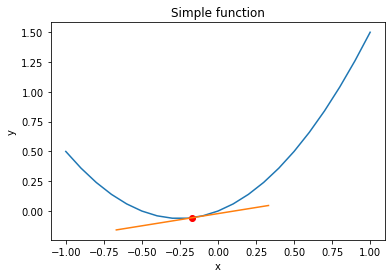

In [ ]:
x_k = 0.0

learning_rate = 0.1

def derivative(x):
  return 2*x + 0.5

for i in range(5):
    gradient = derivative(x_k)
    x_k = x_k - learning_rate*gradient

print('Estimated minimum %0.2f, %0.2f' % (x_k, parabola(x_k)))
print('Derivative (gradient) %0.2f' % gradient)

x = [i * 0.1 for i in range(-10, 11)]
y = [parabola(xi) for xi in x]
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_k, parabola(x_k), 'ro')
line_x = [x_k - 0.5, x_k + 0.5]
line_y = [gradient*(xi-x_k)+parabola(x_k) for xi in line_x]
plt.plot(line_x, line_y)
plt.title('Simple function')

## Backpropagation Algorithm

[Backpropagation](https://en.wikipedia.org/wiki/Backpropagation) is a widely used algorithm for training machine learning models. It attempts to learn weights and biases by iteratively adjusting these values in order to minimize the loss between predicted and expected output.

In [ ]:
num_features = iris.data.shape[1]

def train_one_epoch(x_train_samples, y_train_samples):
  cost = 0.0
  dw = [0.0] * num_features
  db = 0.0

  global bias, weights

  m = len(x_train_samples)
  for i in range(m):
    x_sample = x_train_samples[i]
    y_sample = y_train_samples[i]
    predicted = predict(x_sample)
    cost = cost + loss(y_sample, predicted)
    
    # dz is the derivative of the loss function
    dz = predicted - y_sample
    
    for j in range(len(weights)):
      dw[j] = dw[j] + x_sample[j] * dz
    db = db + dz
  
  cost = cost / m
  db = db / m
  bias = bias - learning_rate*db
  for j in range(len(weights)):
    dw[j] = dw[j] / m
    weights[j] = weights[j] - learning_rate*dw[j]
  
  return cost

## Training Algorithm

This algorithm with iterate through the training data many times and call the backpropagation function.

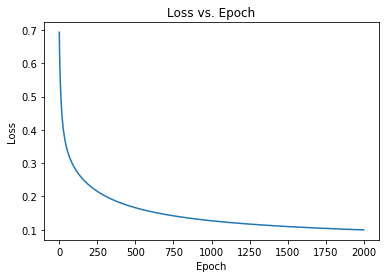

In [ ]:
# Model will "learn" values for the weights and biases

weights = [0.0] * num_features
bias = 0.0

learning_rate = 0.1

epochs = 2000

x_train_samples = iris.data
y_train_samples = [1 if y == 2 else 0 for y in iris.target]

loss_array = []
for epoch in range(epochs):
  loss_value = train_one_epoch(x_train_samples, y_train_samples)
  loss_array.append(loss_value)

plt.plot(range(epochs), loss_array)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss vs. Epoch')
plt.show()

## Make Predictions

Once the model is trained, it can be used to make predictions.

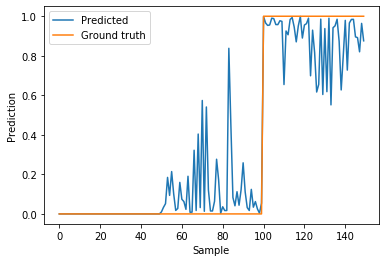

Accuracy: 98.00 %


In [ ]:
predictions = []

m = len(x_train_samples)
correct = 0
for i in range(m):
  sample = x_train_samples[i]
  value = predict(sample)
  predictions.append(value)
  if value >= 0.5:
    value = 1
  else:
    value = 0
  if value == y_train_samples[i]:
    correct = correct + 1.0

plt.plot(range(m), predictions, label='Predicted')
plt.plot(range(m), y_train_samples, label='Ground truth')
plt.ylabel('Prediction')
plt.xlabel('Sample')
plt.legend(loc='best')
plt.show()

print('Accuracy: %.2f %%' % (100 * correct/m))